#Boosting is an ensemble technique in which the predictors are not made independently, but sequentially.
This technique employs the logic in which the subsequent predictors learn from the mistakes of the previous predictors. Therefore, the observations have an unequal probability of appearing in subsequent models and ones with the highest error appear most. The predictors can be chosen from a range of models like decision trees, regressors, classifiers etc. Because new predictors are learning from mistakes committed by previous predictors, it takes less time/iterations to reach close to actual predictions. But we have to choose the stopping criteria carefully or it could lead to overfitting on training data. Gradient Boosting is an example of boosting algorithm.

Q1: How to do training and testing?
Q2: Which algorithm to use for prediction?

When using a boosting technique, we are essentially concerned about only Q1 above. We are free to use any algorithm … it could be decision tree, or NN or KNN or SVM. Now lets look at how is training/testing done here. Boosting methods also produce multiple random samples, but it is done more thoughtfully. The subsequent samples depend on weights given to records in the previous sample which did not predict correctly - hence called weak learners. The final prediction is also not a simple average of all 100 predictions, but a weighted average


Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. (Wikipedia definition)

The objective of any supervised learning algorithm is to define a loss function and minimize it. Let’s see how maths work out for Gradient Boosting algorithm. Say we have mean squared error (MSE) as loss defined as:

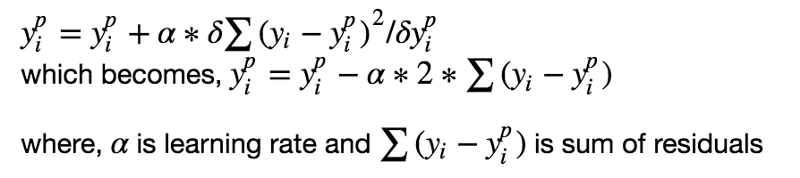


We want our predictions, such that our loss function (MSE) is minimum. By using gradient descent and updating our predictions based on a learning rate, we can find the values where MSE is minimum.


So, we are basically updating the predictions such that the sum of our residuals is close to 0 (or minimum) and predicted values are sufficiently close to actual values.
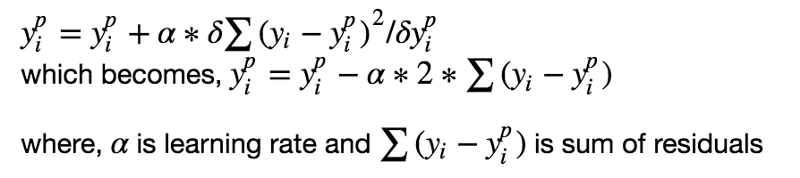

Intuition behind Gradient Boosting
The logic behind gradient boosting is simple, (can be understood intuitively, without using mathematical notation). I expect that whoever is reading this post might be familiar with simple linear regression modeling.


In [ ]:
Boosting is an ensemble technique in which the predictors are not made independently, but sequentially.

# Code

# Classifier

GradientBoostingClassifier(loss=’deviance’, learning_rate=0.1, n_estimators=100, subsample=1.0, criterion=’friedman_mse’, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort=’auto’)[source]

In [ ]:
#Import Library 
from sklearn.ensemble import GradientBoostingClassifier 
#Assumed you have, X (predictor) and Y (target) for
#training data set and x_test(predictor) of test_dataset #Create Gradient Boosting Classifier object 
model= GradientBoostingClassifier(n_estimators=100,learning_rate=1.0, max_depth=1, random_state=0) 

#Train the model using the training sets and check score 
model.fit(X, y) 
#Predict Output 
predicted= model.predict(x_test)


#Loss : {‘deviance’, ‘exponential’}, optional (default=’deviance’)

loss function to be optimized. ‘deviance’ refers to deviance (= logistic regression) for classification with probabilistic outputs. For loss ‘exponential’ gradient boosting recovers the AdaBoost algorithm.

#learning_rate : float, optional (default=0.1)

learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

#n_estimators : int (default=100)

The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

#max_depth : integer, optional (default=3)

maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

In [ ]:
# accuracy decrease when increase in learning rate for same max_depth and  number of estimators
#accuracy increase when decrease in learning rate for same max_depth and  number of estimators

#accuracy remain almost same when increase in n_estimators  for same max_depth and number of estimators
#accuracy decrease when decrease in n_estimators  for same max_depth and number of estimators

#accuracy increase when increase in max_depth for same n_estimators and  learning rate
#accuracy decrease when decrease in max_depth for same n_estimators and  learning rate

# Regressor

GradientBoostingRegressor(loss=’ls’, learning_rate=0.1, n_estimators=100, subsample=1.0, criterion=’friedman_mse’, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort=’auto’)[source]

learning_rate : float, optional (default=0.1)

learning rate shrinks the contribution of each tree by learning_rate.
There is a trade-off between learning_rate and n_estimators.

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)

#----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d(np.random.uniform(0, 10.0, size=100)).T


# Observations
y = f(X).ravel()

dy = 1.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise


# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
xx = np.atleast_2d(np.linspace(0, 10, 1000)).T
xx = xx.astype(np.float32)

alpha = 0.95

y

array([ -3.43002364,   6.98466626,   0.55471986,   1.62440858,
         0.71281811,  -4.43350014,   3.35853477,   4.24576381,
        -1.95037428,  -4.4540776 ,  -3.86510765,   3.49704142,
         1.86171863,   2.80455344,  -0.73569617,   0.49426162,
        -3.01991022,  -4.3020568 ,   2.47952773,   1.5328921 ,
         9.41244932,  -2.14307648,   3.37109981,   0.82329951,
         3.85268317,   5.95885755,   5.82937116,  -0.4336307 ,
         1.75544317,   4.86515935,   3.59576197,  -4.40244791,
        -0.0687922 ,  -4.82726249,   1.17963166,   0.50057599,
         4.93355727,   9.79665129,  -0.22778619,   5.65281109,
        -3.26678823,   7.36299912,   1.36552727,   7.7683086 ,
         2.67835743,  -3.76347879,   6.30685137,   3.05775511,
         2.10794213,  -1.20859131,   0.98410429,   4.3222192 ,
         3.48628717,   3.01963646,  -5.51692209,   2.12035801,
        -3.91498256,   5.52823513,  -5.53112684,   0.45252291,
        -1.99821755,  -5.25741142,   1.8894857 ,   1.07

In [38]:
clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

clf.fit(X, y)

# Make the prediction on the meshed x-axis
y_upper = clf.predict(xx)

clf.set_params(alpha=1.0 - alpha)
clf.fit(X, y)

# Make the prediction on the meshed x-axis
y_lower = clf.predict(xx)

clf.set_params(loss='ls')
clf.fit(X, y)

# Make the prediction on the meshed x-axis
y_pred = clf.predict(xx)

In [39]:
y_pred

array([ 0.54459438,  0.54459438,  0.54459438,  0.54459438,  0.54459438,
        0.54459438,  0.54459438,  0.54459438,  0.54459438,  0.54459438,
        0.54459438,  0.54459438,  0.54459438,  0.54459438,  0.54459438,
        0.54459438,  0.54459438,  0.54459438,  0.54459438,  0.54459438,
        0.54459438,  0.54459438,  0.54459438,  0.54459438,  0.54459438,
        0.54459438,  0.54459438,  0.54459438,  0.54459438,  0.54459438,
        0.54459438,  0.54459438,  0.54459438,  0.54459438,  0.54459438,
        0.54459438,  0.54459438,  0.54459438,  0.54459438,  0.54459438,
        0.54459438,  0.54459438,  0.54459438,  0.54459438,  0.54459438,
        0.54459438,  0.54459438,  0.54459438,  0.54459438,  0.54459438,
        0.54459438,  0.54459438,  0.54459438,  0.54459438,  0.54459438,
        0.54459438,  0.54459438,  0.54459438,  0.54459438,  0.54459438,
        0.54459438,  0.54459438,  0.54459438,  0.54459438,  0.54459438,
        0.54459438,  0.54459438,  0.54459438,  0.54459438,  0.54

Both are boosting algorithms which means that they convert a set of weak learners into a single strong learner. They both initialize a strong learner (usually a decision tree) and iteratively create a weak learner that is added to the strong learner. They differ on how they create the weak learners during the iterative process.

Adaboost and gradboosting [XGBoost] are two different ways to derive boosters. Both are generic. I like gradboosting better because it works for generic loss functions, while adaboost is derived mainly for classification with exponential loss.